In [1]:
import os
import numpy as np
import glob
import SimpleITK as sitk
from myshow import myshow
# import matplotlib.pyplot as plt
# %matplotlib inline

In [2]:
def print_stats(img):
    statFilter = sitk.StatisticsImageFilter()
    statFilter.Execute(img)
    minimum = statFilter.GetMinimum()
    maximum = statFilter.GetMaximum()
    #print('mean:',statFilter.GetMean())
    #print('std:',statFilter.GetSigma())
    print('max:',maximum)
    print('min:',minimum)
    return [minimum, maximum]

In [3]:
template_name = 'template_13-18'
number_of_priors = 10

In [4]:
# template_name = 'ADNI_Brain_Template'
# number_of_priors = 6

In [5]:
indir='/Users/aghayoor/Desktop/Alexander_disease_dev/templates/' + template_name + '/Priors_orig/'
priors_fn_list = [os.path.join(indir, 'priors'+str("%.2d" % i)+'.nii') for i in range(1, number_of_priors+1)]

In [6]:
# indir='/Users/aghayoor/Desktop/Alexander_disease_dev/templates/' + template_name + '/nihpd_sym_all_nifti/'
# priors_fn_list = glob.glob(indir+"*.nii") # this also lists other possible images than priors
# priors_fn_list.sort()

In [7]:
print(priors_fn_list)

['/Users/aghayoor/Desktop/Alexander_disease_dev/templates/template_13-18/Priors_orig/priors01.nii', '/Users/aghayoor/Desktop/Alexander_disease_dev/templates/template_13-18/Priors_orig/priors02.nii', '/Users/aghayoor/Desktop/Alexander_disease_dev/templates/template_13-18/Priors_orig/priors03.nii', '/Users/aghayoor/Desktop/Alexander_disease_dev/templates/template_13-18/Priors_orig/priors04.nii', '/Users/aghayoor/Desktop/Alexander_disease_dev/templates/template_13-18/Priors_orig/priors05.nii', '/Users/aghayoor/Desktop/Alexander_disease_dev/templates/template_13-18/Priors_orig/priors06.nii', '/Users/aghayoor/Desktop/Alexander_disease_dev/templates/template_13-18/Priors_orig/priors07.nii', '/Users/aghayoor/Desktop/Alexander_disease_dev/templates/template_13-18/Priors_orig/priors08.nii', '/Users/aghayoor/Desktop/Alexander_disease_dev/templates/template_13-18/Priors_orig/priors09.nii', '/Users/aghayoor/Desktop/Alexander_disease_dev/templates/template_13-18/Priors_orig/priors10.nii']


In [8]:
priors = [sitk.ReadImage(priors_fn_list[i]) for i in range(0, len(priors_fn_list))]

In [9]:
[priors[i].GetPixelID() for i in range(0, len(priors))]

[9, 9, 9, 9, 9, 9, 8, 8, 9, 9]

In [10]:
# priors[2] = sitk.Cast(priors[2], priors[0].GetPixelID())
priors[6] = sitk.Cast(priors[6], priors[0].GetPixelID())
priors[7] = sitk.Cast(priors[7], priors[0].GetPixelID())

In [11]:
[priors[i].GetPixelID() for i in range(0, len(priors))]

[9, 9, 9, 9, 9, 9, 9, 9, 9, 9]

In [12]:
for i in range(0,len(priors)):
    print("*** prior: "+str(i+1))
    print_stats(priors[i])

*** prior: 1
max: 0.92841197872586
min: 0.007948054145780502
*** prior: 2
max: 0.927892247816092
min: 0.007948054145780502
*** prior: 3
max: 0.9981950258116191
min: 0.016436053585020004
*** prior: 4
max: 0.9284401084915949
min: 0.007948054145780502
*** prior: 5
max: 0.9257292697579791
min: 0.007948054145780502
*** prior: 6
max: 0.9257292697579791
min: 0.007948054145780502
*** prior: 7
max: 1.0000159740447998
min: 0.0
*** prior: 8
max: 1.0000159740447998
min: 0.0
*** prior: 9
max: 0.9364015019508886
min: 0.0
*** prior: 10
max: 0.9364015019508886
min: 0.0


In [13]:
sumImage = sum(priors)
out_fn = os.path.join(indir, 'sum_image.nii.gz')
sitk.WriteImage(sumImage,out_fn)

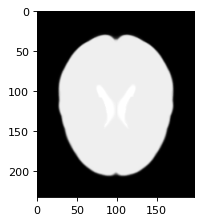

In [14]:
myshow(sumImage)

In [15]:
[mini, maxi] = print_stats(sumImage)

max: 1.0562053798474602
min: 0.07315232319240152


In [16]:
if (maxi > 1):
    new_priors = [priors[i]/maxi for i in range(0, len(priors))]
    new_sumImage = sum(new_priors)
    print_stats(new_sumImage)
    odir='/Users/aghayoor/Desktop/Alexander_disease_dev/templates/' + template_name + '/Priors/'
    if not os.path.isdir(odir):
        os.makedirs(odir)
    out_sum_fn = os.path.join(odir, 'sum_image.nii.gz')
    sitk.WriteImage(new_sumImage,out_sum_fn)
    new_priors_fn_list = [os.path.join(odir, 'priors'+str("%.2d" % i)+'.nii') for i in range(1, number_of_priors+1)]
    [sitk.WriteImage(new_priors[i],new_priors_fn_list[i]) for i in range(0, len(new_priors))]

max: 1.0
min: 0.06925956313815251
